In [1]:
#PYTHON API CHALLENGE

In [2]:
#INDEX

#dependencies

#Part I - WeatherPy
#SECTION I: Create a list of cities with citypi
#SECTION II: request info from openweather
#SECTION III: SCATTERPLOTS
#SECTION IV LINEAR REGRESSIONS

#Part II - VacationsPy

#SECTION 1 : HEAT MAP
#SECTION 2: FIND IDEAL CONDITIONS 
#SECTION 3: SEARCH FOR HOTEL
#SECTION 4: HOTELS & HUMIDITY


In [3]:
#DEPENDENCIES

import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from pprint import pprint
from scipy import stats
import random
from random import randrange
#from numpy import random

In [4]:
# Part I - WeatherPy
#Overal objective: observe if temperture is hotter closer to the equator.


In [5]:
#SECTION I: Create a list of cities with citypi

In [155]:
# 1.1 Create a list o lists of +500 cities that has the system coordinates
#Then the sample of cities have to be distributed from various ranges of latitude

#northhemisphere cities
NH=[]
#south hemisphere cities
SH=[]


#Create a loop with citypi to create random city lists

for x in range(0,501):
    a= randrange(0,60)
    b= randrange(-180,180)
    mity =citipy.nearest_city(a,b)
    NH.append(mity.city_name)

for y in range(0,501):
    c= randrange(-60,-1)
    d= randrange(-180,180)
    dity =citipy.nearest_city(c,d)
    SH.append(dity.city_name)
    

In [156]:
#SECTION II: request info from openweather
#NH

In [157]:
# 2.1 Bring information from open weather

#!!! config key!!!!!
from config import api_key


url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build query URL
query_url = f"{url}appid={api_key}&units={units}&q="



In [158]:
# 2.2 Create empty list to gather data SOUTH
latitude_south = []
longitude_south=[]
temperature_south = []
cloudiness_south =[]
windspeed_south=[]
humidity_south=[]

# Loop through the list of list_cities and perform a request 
for x in SH:
    responseS = requests.get(query_url + x).json()
    try:
        latitude_south.append(responseS['coord']['lat'])
        longitude_south.append(responseS['coord']['lon'])
        temperature_south.append(responseS['main']['temp'])
        cloudiness_south.append(responseS['clouds']['all'])
        windspeed_south.append(responseS['wind']['speed'])
        humidity_south.append(responseS['main']['humidity'])

        
    except (KeyError, IndexError):
        next 

In [161]:

lat_lon_south={ 
    "lat": latitude_south,
    "lon": longitude_south,
    "temp": temperature_south, 
    "cloud": cloudiness_south,
    "wind": windspeed_south,
    "humidity": humidity_south
}
latlon_south= pd.DataFrame(lat_lon_south)
latlon_south.head()


,lat,lon,temp,cloud,wind,humidity
0,-8.7386,24.9906,18.87,100,0.99,92
1,-7.9562,38.9716,24.01,88,1.37,94
2,-21.1500,149.2000,31.49,43,4.63,55
3,-23.1203,-134.9692,26.74,93,5.05,74
4,5.4112,100.3354,26.06,20,1.54,73


In [162]:
#2.3 Create empty list to gather data NORTH
latitude_north = []
temperature_north = []
cloudiness_north =[]
windspeed_north=[]
humidity_north=[]
longitude_north=[]

# Loop through the list of list_cities and perform a request 
for x in NH:
    responseN = requests.get(query_url + x).json()
    try:
        latitude_north.append(responseN['coord']['lat'])
        longitude_north.append(responseS['coord']['lon'])
        temperature_north.append(responseN['main']['temp'])
        cloudiness_north.append(responseN['clouds']['all'])
        windspeed_north.append(responseN['wind']['speed'])
        humidity_north.append(responseN['main']['humidity'])
    except (KeyError, IndexError):
        next 

In [164]:
# 2.4 create a data frame from cities, lat, and temp SOUTH
lat_lon_north = {
    
    "lat": latitude_north,
    "lon": longitude_north,
    "temp": temperature_north,
    "cloud": cloudiness_north,
    "wind": windspeed_north,
    "humidity": humidity_north
}
latlon_north = pd.DataFrame(lat_lon_north)
latlon_north.head()

,lat,lon,temp,cloud,wind,humidity
0,50.2696,-90.3518,-14.50,3,0.42,74
1,64.3833,-90.3518,-11.62,100,7.62,91
2,33.0833,-90.3518,13.00,20,1.03,88
3,59.7035,-90.3518,-9.91,75,3.00,86
4,17.9583,-90.3518,20.99,0,2.73,65


In [165]:
#MERGE SOUTH AND NORTH DATA
frames=[latlon_south,latlon_north]
df= pd.concat(frames)
df

,lat,lon,temp,cloud,wind,humidity
0,-8.7386,24.9906,18.87,100,0.99,92
1,-7.9562,38.9716,24.01,88,1.37,94
2,-21.1500,149.2000,31.49,43,4.63,55
3,-23.1203,-134.9692,26.74,93,5.05,74
4,5.4112,100.3354,26.06,20,1.54,73
...,...,...,...,...,...,...
466,15.0000,-90.3518,25.10,0,3.82,80
467,64.3833,-90.3518,-11.62,100,7.62,91
468,46.4856,-90.3518,-5.99,100,3.93,96
469,22.0752,-90.3518,25.43,40,4.12,69


In [166]:
#SECTION III: SCATTERPLOTS
# Build a scatter plot for each data type
lat_xvalues = df['lat']

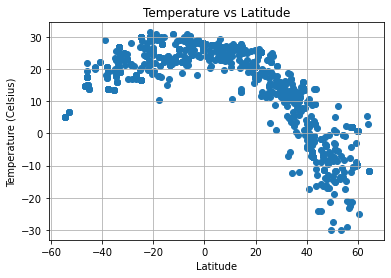

In [167]:
#TEMPERATURE

temp_yvalues = df['temp']
plt.scatter(lat_xvalues,temp_yvalues)

# Incorporate the other graph properties
plt.title("Temperature vs Latitude")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Temperaturevslat.png")

# Show plot
plt.show()


# TEMPERATURE IS HIGHER BELOW THE EQUATOR

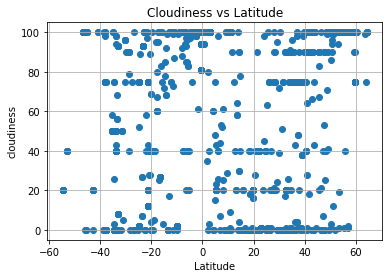

In [168]:
# CLOUDINESS

cloud_yvalues = df['cloud']
plt.scatter(lat_xvalues,cloud_yvalues)

# Incorporate the other graph properties
plt.title("Cloudiness vs Latitude")
plt.ylabel("cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("cloudinesslat.png")

# Show plot
plt.show()

# CLOUDINESS has no clear tendency

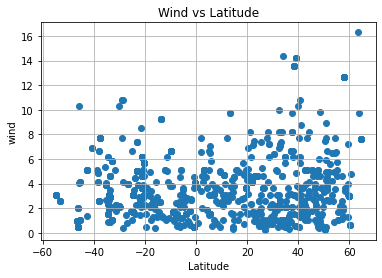

In [169]:
# WIND

wind_yvalues = df['wind']
plt.scatter(lat_xvalues,wind_yvalues)

# Incorporate the other graph properties
plt.title("Wind vs Latitude")
plt.ylabel("wind")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("windlat.png")

# Show plot
plt.show()

# CLOUDINESS has no clear tendency within latitudes

In [170]:
#SECTION IV LINEAR REGRESSIONS

The r-value is: 0.6412930907972473


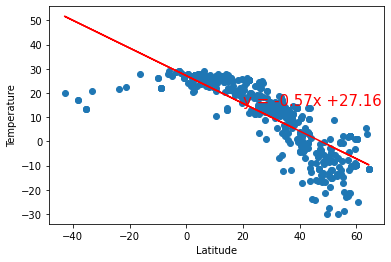

In [171]:
#1 Northern Hemisphere - Temperature (F) vs. Latitude

nax_values = latlon_north['lat']  #
nby_values = latlon_north['temp']  #

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(nax_values, nby_values)

# Get regression values
regress_values_one = nax_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(nax_values,nby_values)
plt.plot(nax_values,regress_values_one,"r-")

# Label plot nd annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

#--> negative correlation more latitude, less temperature

The r-value is: 0.24338920667471658


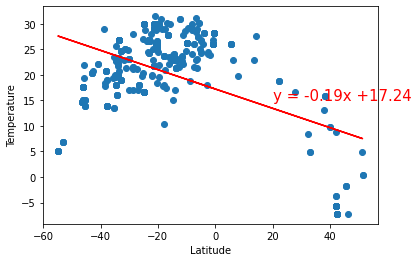

In [172]:
#2 Southern Hemisphere - temperature (%) vs. Latitude

sax_values = latlon_south['lat'] #
sby_values = latlon_south['temp'] #

 #Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(sax_values, sby_values)

# Get regression values
regress_values_one = sax_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(sax_values,sby_values)
plt.plot(sax_values,regress_values_one,"r-")

# Label plot nd annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

#--> negative correlation less latitude, more temperature

The r-value is: 0.027464516239538196


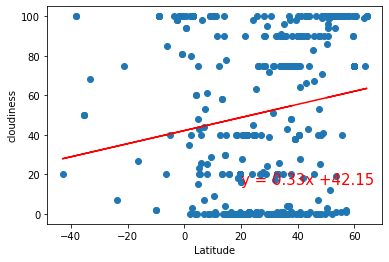

In [173]:
#3 Northern Hemisphere - Cloudiness (%) vs. Latitude

ncx_values = latlon_north['lat']
ndy_values = latlon_north['cloud']


#ncx_values = weather_data_II['lat']
#ndy_values = weather_data_II['cloud']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(ncx_values, ndy_values)

# Get regression values
regress_values_three = ncx_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(ncx_values,ndy_values)
plt.plot(ncx_values,regress_values_three,"r-")

# Label plot nd annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

#--> negative correlation less latitude, more temperature, altough r .04 no significance

The r-value is: 0.05216657795697349


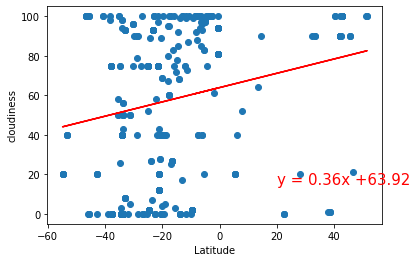

In [174]:
#4 Southern Hemisphere - Cloudiness (%) vs. Latitude

scx_values = latlon_south['lat']#
sdy_values = latlon_south['cloud']#

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(scx_values, sdy_values)

# Get regression values
regress_values_four = scx_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(scx_values,sdy_values)
plt.plot(scx_values,regress_values_four,"r-")

# Label plot nd annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()


#--> no significance r .03

The r-value is: 0.019394011608025657


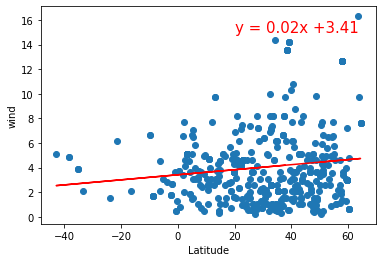

In [175]:
#5 Northern Hemisphere - Wind Speed (mph) vs. Latitude


nfx_values = latlon_north['lat']
ngy_values = latlon_north['wind']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(nfx_values, ngy_values)

# Get regression values
regress_values_NHWL = nfx_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(nfx_values,ngy_values)
plt.plot(nfx_values,regress_values_NHWL,"r-")

# Label plot nd annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('wind')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

#vast mayority of the sample is below 7.5 

The r-value is: 0.022519468285616902


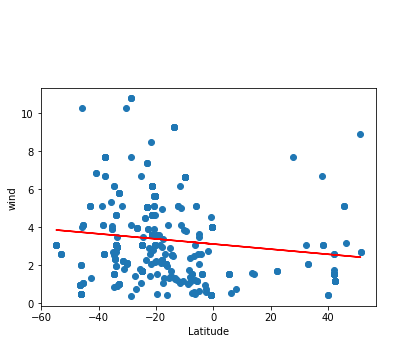

In [176]:
#6 Southern Hemisphere - Wind Speed (mph) vs. Latitude


sfx_values = latlon_south['lat']
sgy_values = latlon_south['wind']


# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(sfx_values, sgy_values)

# Get regression values
regress_values_SHWL = sfx_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(sfx_values,sgy_values)
plt.plot(sfx_values,regress_values_SHWL,"r-")

# Label plot nd annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('wind')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

#in this sample, more disperse the velocities

The r-value is: 0.06024966003264311


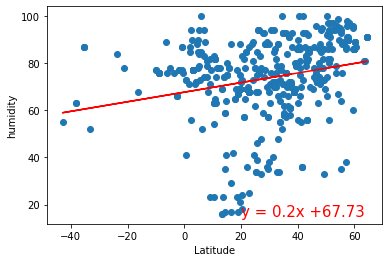

In [177]:
#7 Northern Hemisphere - Humidity (%) vs. Latitude

nfx_values = latlon_north['lat']
wind_valuesN = latlon_north['humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(nfx_values, wind_valuesN)

# Get regression values
regress_values_NHHL = nfx_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(nfx_values,wind_valuesN)
plt.plot(nfx_values,regress_values_NHHL,"r-")

# Label plot nd annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

#positive correlation, more latitude more humidity

The r-value is: 0.0026757414950319513


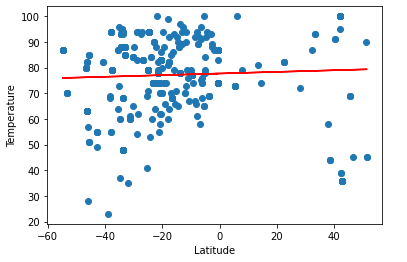

In [178]:
#8 Southern Hemisphere - Humidity (%) vs. Latitude

sfx_values = latlon_south['lat']
wind_valuesS = latlon_south['humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(sfx_values, wind_valuesS)

# Get regression values
regress_values_SHHL = sfx_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(sfx_values,wind_valuesS)
plt.plot(sfx_values,regress_values_SHHL,"r-")

# Label plot nd annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [179]:
# Part II - VacationPy

In [199]:
#SECTION 1 : HEAT MAP
#Create a heat map that displays the humidity for every city from Part I.
import gmaps
# Google developer API key
from config import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)

locations= df[["lat","lon"]]
humidities= df["humidity"]

# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=humidities, 
                                 dissipating=False, max_intensity=10,
                                 point_radius=10)

# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [198]:
#SECTION 2: FIND IDEAL CONDITIONS 
#Narrow down the DataFrame to find your ideal weather condition. For example:#A max temperature lower than 80 degrees but higher than 70.Wind speed less than 10 mph.Drop any rows that don't contain all three conditions. You want to be sure the weather is ideal.

selected_cities=df.loc[df["temp"] >= 30]
selected_cities
 
#find names of cities

,lat,lon,temp,cloud,wind,humidity
2,-21.1500,149.2000,31.49,43,4.63,55
8,-21.2000,-175.2000,30.00,20,4.63,74
12,-24.8667,113.6333,30.00,75,3.09,79
32,-24.8667,113.6333,30.00,75,3.09,79
33,-19.5500,169.2667,30.00,40,3.60,74
58,-20.3167,118.5667,30.00,40,4.63,62
65,-24.8667,113.6333,30.00,75,3.09,79
68,-19.5500,169.2667,30.00,40,3.60,74
148,-19.5500,169.2667,30.00,40,3.60,74
149,-19.0595,-169.9187,31.00,5,3.60,66


In [197]:
#SECTION 3: SEARCH FOR HOTEL


#MARKERS
coordinates=[(-21.15,149.2),
(-21.2,-175.2),
(-24.8667,113.6333),
(-24.8667,113.6333),
(-19.55,169.2667),
(-20.3167,118.5667),
(-24.8667,113.6333),
(-19.55,169.2667),
(-19.55,169.2667),
(-19.0595,-169.9187),
(-24.8667,113.6333),
(-24.8667,113.6333),
(-6.7221,146.9847),
(-5.5502,150.1429),
(-12.2333,136.7667),
(-24.8667,113.6333),
(-5.5502,150.1429),
(-21.2,-175.2),
(-24.8667,113.6333),
(-21.2,-175.2),
(-21.2,-175.2),
(-21.2,-175.2),
(-7.9631,145.7785),
(-12.2333,136.7667),
(-24.8667,113.6333),
(-21.2,-175.2),
(-16.9167,145.7667),
(-24.8667,113.6333),
(-15.7667,128.7333)]

# Customize the size of the figure
figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

# Assign the marker layer to a variable
markers = gmaps.marker_layer(coordinates)

figtwo = gmaps.figure(layout=figure_layout)
# Add the layer to the map
fig.add_layer(markers)
fig




Figure(layout=FigureLayout(height='420px'))

In [203]:
#Using Google Places API to find the first hotel for each city located within 5000 meters of your coordinates.


# geocoordinates
target_coordinates = "-21.15,149.2","-21.2,-175.2"
target_search = "hotel"
target_radius = 5000


# set up a parameters dictionary
params = {
    "location": target_coordinates,
    "keyword": target_search,
    "radius": target_radius,
    "key": gkey
}

# base url
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

# run a request using our params dictionary
response = requests.get(base_url, params=params)
response.json()


{'html_attributions': [],
 'next_page_token': 'ATtYBwJauNQFBKPQlNXhcTDtP2mH4FnHVYqDd-IKtaiemtw26_sN4ZKbKQlaRWKM9Hdqq3RO2QYxtLKKRgVIo8JK0T-XeloFA8mafUkYBjZFsJGLesvGO6GmyBjlKC2ru1--H5sbwR-BfP7UlcDQwQpGiGdTxSHfUDTVad54WkW1N1B-qx85tqhhI2kkMC8x0YB8KrQMjeKv9wonXjXzriGKLCP5hE-xC4H5T1ZvuK5qIgT0Y7YhpSe64rkVubee2MgMJO5aiTfwFGxNXkkYd-jCEdsHktbs6v6omL_Atc61g1lJMyRKd_G-u-ATjoYogmBC6rO2LQ4AVMGM0gKIwm5KzXb9zahMxtLxILK0kOcEPzbo85ZJIAsZjqehWhcHYlo5Qqczd05Rq996WNZPlJszozdkBd40mUHhyt1UUYoTFjRagiiJMD4h2g',
 'results': [{'business_status': 'OPERATIONAL',
   'geometry': {'location': {'lat': -21.1120683, 'lng': 149.2240027},
    'viewport': {'northeast': {'lat': -21.11062282010728,
      'lng': 149.2249849798927},
     'southwest': {'lat': -21.11332247989272, 'lng': 149.2222853201073}}},
   'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/lodging-71.png',
   'name': 'Mantra Mackay',
   'opening_hours': {'open_now': True},
   'photos': [{'height': 3496,
     'html_attributions': ['<a href=

In [ ]:
#SECTION 4: HOTELS & HUMIDITY
#Plot the hotels on top of the humidity heatmap with each pin containing the Hotel Name, City, and Country.

In [ ]:
hotel_layer=gmaps.heatmap_layer(response, weights=rating, 
                                 dissipating=False, max_intensity=10,
                                 point_radius=1)
# Add layer
fig.add_layer(heat_layer,hotel_layer)